# Hotel Data Analysis Report 
Your boss wants a report to understand the relationshi8p between average daily rate for hotels and the lead time before booking. 

1. You need to compile a collection of excel sheets into a single dataset and filter out cancellations.
2. Create a simple linear regression between these two variables.

In [1]:
# bring in our libraries

import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
from scipy.stats import linregress

In [2]:
#bring in our data
df1=pd.read_excel("C:/Users/Gideon Bergbaum/Python_Udemy/hotel_revenue_historical_full.xlsx",sheet_name="2018")
df2=pd.read_excel("C:/Users/Gideon Bergbaum/Python_Udemy/hotel_revenue_historical_full.xlsx",sheet_name="2019")
df3=pd.read_excel("C:/Users/Gideon Bergbaum/Python_Udemy/hotel_revenue_historical_full.xlsx",sheet_name="2020")
full_dataset=pd.concat([df1, df2, df3],ignore_index=True)

In [3]:
full_dataset.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
141942,City Hotel,1,1,2020,February,5,1,0,0,1,...,No Deposit,NaN,153.0,0,Transient,0.0,0,1,No-Show,2020-02-01
141943,City Hotel,1,31,2020,July,29,16,2,0,1,...,No Deposit,NaN,NaN,0,Transient,135.0,0,2,No-Show,2020-07-16
141944,City Hotel,1,25,2020,May,18,6,2,1,1,...,No Deposit,NaN,450.0,0,Transient,125.0,0,0,No-Show,2020-05-06
141945,City Hotel,1,6,2020,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2020-07-17
141946,City Hotel,1,0,2020,August,31,2,0,2,1,...,No Deposit,NaN,40.0,0,Transient,65.0,0,1,No-Show,2020-08-02


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141947 entries, 0 to 141946
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141947 non-null  object        
 1   is_canceled                     141947 non-null  int64         
 2   lead_time                       141947 non-null  int64         
 3   arrival_date_year               141947 non-null  int64         
 4   arrival_date_month              141947 non-null  object        
 5   arrival_date_week_number        141947 non-null  int64         
 6   arrival_date_day_of_month       141947 non-null  int64         
 7   stays_in_weekend_nights         141947 non-null  int64         
 8   stays_in_week_nights            141947 non-null  int64         
 9   adults                          141947 non-null  int64         
 10  children                        141939 non-null  float64

In [5]:
full_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
full_dataset['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.627755
1    0.372245
Name: proportion, dtype: float64

In [28]:
#Filtering for rows that are NOT cancelled
filtered_data=full_dataset[full_dataset['is_canceled']!=1]
filtered_data.to_csv('filtered_hotel_dataset.csv')
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89108 entries, 7951 to 141598
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           89108 non-null  object        
 1   is_canceled                     89108 non-null  int64         
 2   lead_time                       89108 non-null  int64         
 3   arrival_date_year               89108 non-null  int64         
 4   arrival_date_month              89108 non-null  object        
 5   arrival_date_week_number        89108 non-null  int64         
 6   arrival_date_day_of_month       89108 non-null  int64         
 7   stays_in_weekend_nights         89108 non-null  int64         
 8   stays_in_week_nights            89108 non-null  int64         
 9   adults                          89108 non-null  int64         
 10  children                        89108 non-null  float64       
 11  bab

C:\Users\Gideon Bergbaum\AppData\Local\Temp\ipykernel_13632\4220666835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['adr'])


<Axes: xlabel='adr', ylabel='Density'>

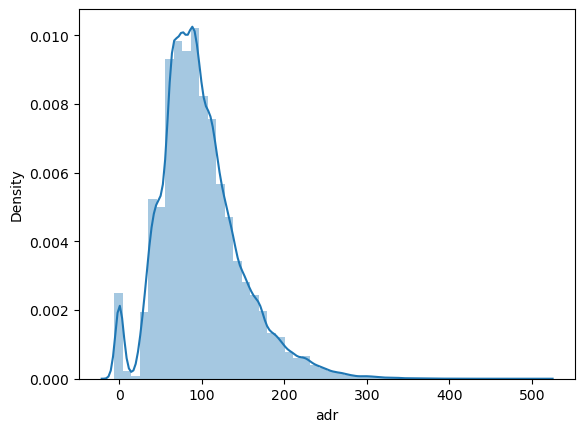

In [8]:
# univariate and bivariate analysis
sns.distplot(filtered_data['adr'])

C:\Users\Gideon Bergbaum\AppData\Local\Temp\ipykernel_13632\4265492482.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
C:\Users\Gideon Bergbaum\AppData\Local\Temp\ipykernel_13632\4265492482.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

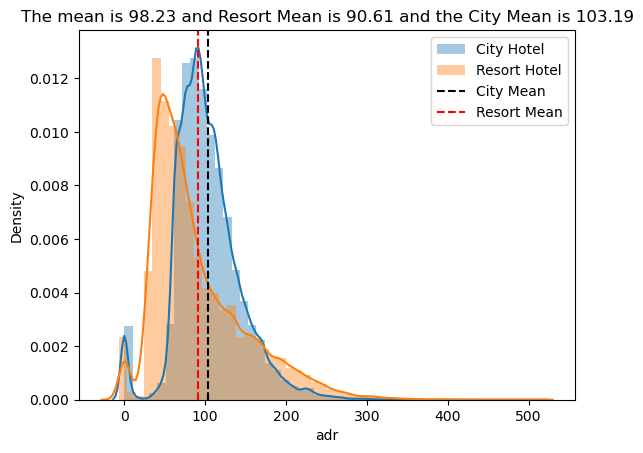

In [9]:
sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'],label='City Hotel')
sns.distplot(filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'],label='Resort Hotel')
resort_mean = filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'].mean()
city_mean =filtered_data[filtered_data['hotel']=='City Hotel']['adr'].mean()
plt.axvline(city_mean,color='black',linestyle='--',label='City Mean')
plt.axvline(resort_mean,color='red',linestyle='--',label='Resort Mean')
plt.legend()
plt.title(f"The mean is {filtered_data['adr'].mean():.2f} and Resort Mean is {resort_mean:.2f} and the City Mean is {city_mean:.2f}")
plt.savefig('ADR_Distribution.png')

C:\Users\Gideon Bergbaum\AppData\Local\Temp\ipykernel_13632\259104910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = filtered_data,y='lead_time',x='hotel',showfliers=False,palette='tab10')


Text(0.5, 1.0, 'The mean is 76.89 and Resort Mean is 77.11 and the City Mean is 76.75')

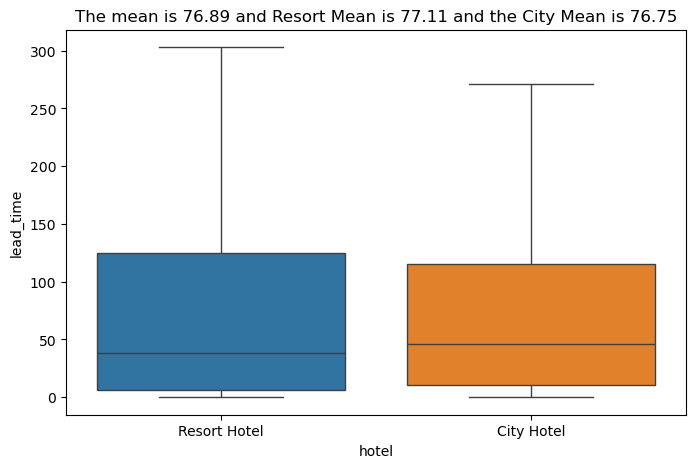

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data = filtered_data,y='lead_time',x='hotel',showfliers=False,palette='tab10')
resort_mean = filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'].mean()
city_mean =filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.title(f"The mean is {filtered_data['lead_time'].mean():.2f} and Resort Mean is {resort_mean:.2f} and the City Mean is {city_mean:.2f}")

<Axes: xlabel='lead_time', ylabel='adr'>

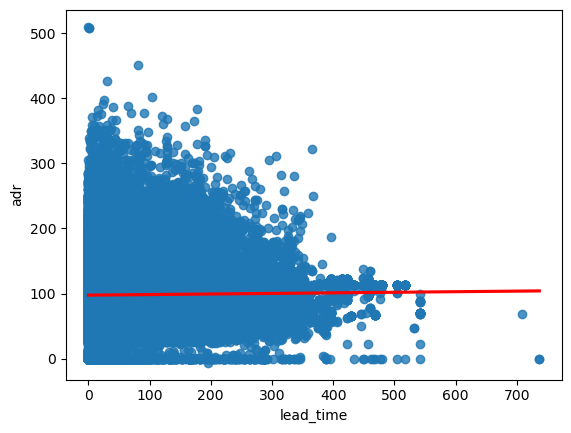

In [11]:
#bivariate analysis and linear regression
sns.regplot(data = filtered_data,y='adr',x='lead_time',line_kws={'color':'red'})

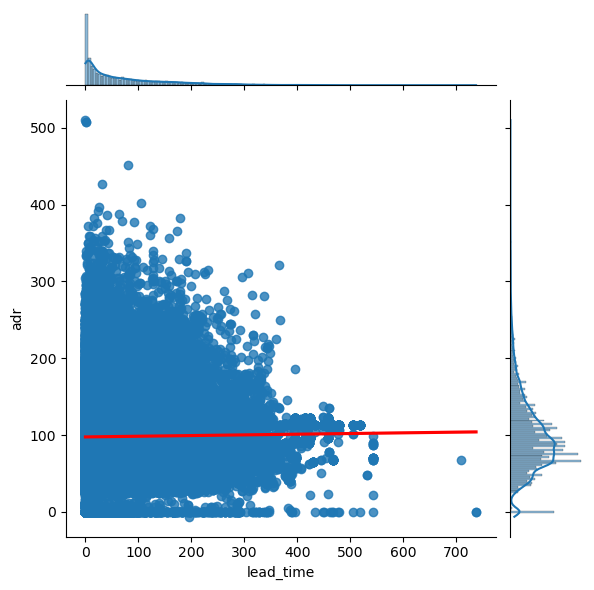

In [15]:
sns.jointplot(data = filtered_data,y='adr',x='lead_time',kind='reg',joint_kws={'line_kws':{'color':'red'}})

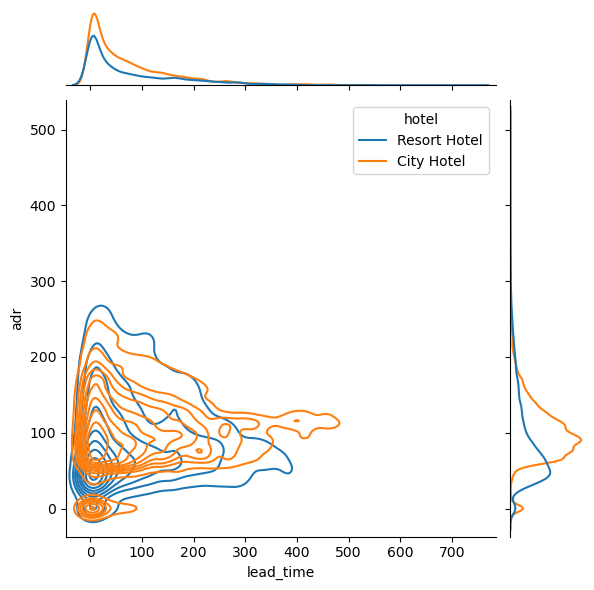

In [20]:
sns.jointplot(data = filtered_data,y='adr',x='lead_time',kind='kde',hue='hotel')

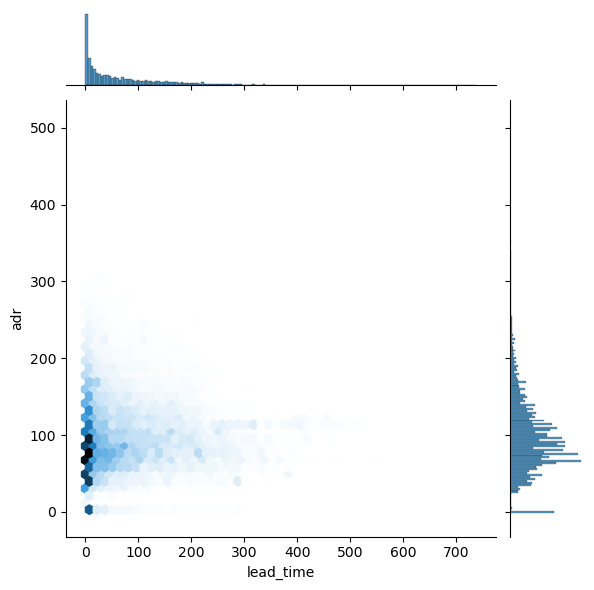

In [19]:
sns.jointplot(data = filtered_data,y='adr',x='lead_time',kind='hex')

In [24]:
#linear regression
linregress(filtered_data['lead_time'],filtered_data['adr'])

LinregressResult(slope=0.008855843930593611, intercept=97.54811713144224, rvalue=0.01612231398546008, pvalue=1.4874734271357559e-06, stderr=0.0018398933719799857, intercept_stderr=0.21597000645033318)

In [27]:
#linear regression
slope=linregress(filtered_data['lead_time'],filtered_data['adr'])[0]
intercept=linregress(filtered_data['lead_time'],filtered_data['adr'])[1]
r2 = linregress(filtered_data['lead_time'],filtered_data['adr'])[2]
regression_table = pd.DataFrame({'Name':['slope','intercept','r2'],'Values':[slope,intercept,r2]})
regression_table

,Name,Values
0,slope,0.008856
1,intercept,97.548117
2,r2,0.016122
